#### Problem Statement 
• X Education sells online courses to industry professionals many professionals who are interested in the courses land on their website and browse the courses. X Education gets so many leads, but its leads conversion rate is very poor that is if they acquire 100 leads in a day only about 30 of them are converted.


• To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 


• X Education wants to know the most promising leads, i.e., the leads that are most likely to convert into paying customers. The company requires  to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.  

In [1]:
# Importing useful libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

pd.set_option("display.max_columns",150)
pd.set_option("display.max_rows",150)

In [2]:
# Importing the data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of data
df.shape

(9240, 37)

In [4]:
#Checking info of variables in dateframe like data type and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Let's check statistical details of numerical variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EDA

### Data Cleaning and preparation
### Univariate analysis

In [6]:
# checking null values percentage in descending order
null_values = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
null_values

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

- We can drop Asymmetrique Profile Index & Asymmetrique Profile Score, since Asymmetrique Activity Index & Asymmetrique Activity Score will resembles same

In [7]:
# Dropping 'Asymmetrique Profile Index' &'Asymmetrique Activity Index'
df = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)

### Asymmetrique Profile Score

In [8]:
df['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

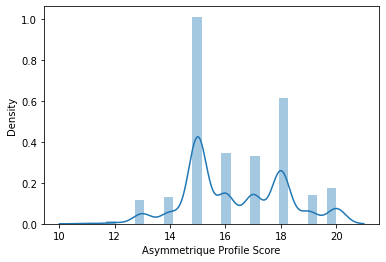

In [9]:
# Data visualization
sns.distplot(df['Asymmetrique Profile Score'])
plt.show()

- Multimodal distrubution is observed.
- Asymmetrique Profile Score of 16 has highest count.

In [10]:
# Treating the missing values with median value as per observation from above stats
df['Asymmetrique Profile Score']= df['Asymmetrique Profile Score'].fillna(df['Asymmetrique Profile Score'].median())

### Asymmetrique Activity Score

In [11]:
df['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

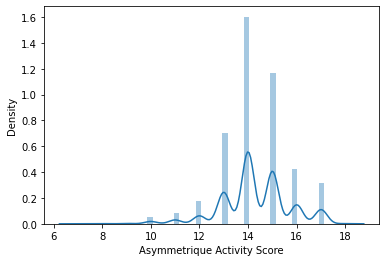

In [12]:
# Data visualization
sns.distplot(df['Asymmetrique Activity Score'])
plt.show()

In [13]:
# Treating the missing values with median value as per observation from above stats
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna(df['Asymmetrique Activity Score'].median())

- Multimodal distrubution is observed.
- Asymmetrique Profile Score of 14 has highest count.

### Let's check Other columns having missing values before dropping them
### Tags

In [14]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [15]:
df['Tags'].value_counts().index

Index(['Will revert after reading the email', 'Ringing',
       'Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Want to take admission but has financial problems', 'Still Thinking',
       'Interested in Next batch', 'In confusion whether part time or DLP',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)'],
      dtype='object')

- Lets fill the values less than 1% and null values with others
- This may be an good interpreter for modeling since it is a feedback by customer

In [16]:
Others = ['invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Want to take admission but has financial problems', 'Still Thinking',
       'Interested in Next batch', 'In confusion whether part time or DLP',
       'Lateral student', 'University not recognized',
       'Shall take in the next coming month',
       'Recognition issue (DEC approval)']
df['Tags'] = df['Tags'].replace(Others,'Others')
df['Tags'].fillna('Others',inplace=True)

In [17]:
df['Tags'].value_counts(normalize=True)*100

Others                                 39.556277
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Not doing further education             1.569264
Interested  in full time MBA            1.266234
Graduation in progress                  1.201299
Name: Tags, dtype: float64

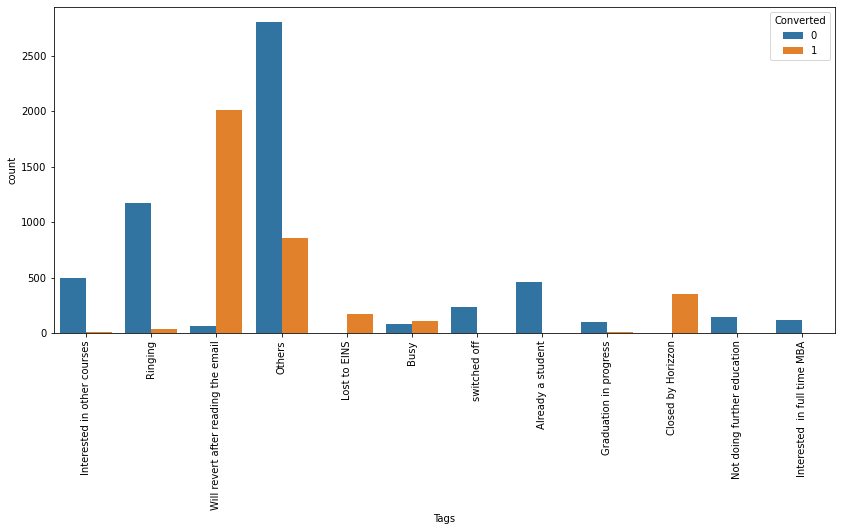

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(df['Tags'],hue=df['Converted'])
plt.xticks(rotation=90)
plt.show()

### What matters most to you in choosing a course

In [19]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- As a general perspective for upskilling is looking for better career prospects so this column can be dropped

In [20]:
df = df.drop('What matters most to you in choosing a course',axis=1)

### Lead Profile

In [21]:
df['Lead Profile'].value_counts()/len(df)

Select                         0.448701
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead Profile, dtype: float64

- From above data we can observe that 29% of data is missing and 45% of the data is not defined. In total unavailable data for this column will be ~74%. So, we can drop this variable

In [22]:
df = df.drop('Lead Profile',axis=1)

### What is your current occupation

In [23]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
df['What is your current occupation'].fillna('Unemployed',inplace=True)

- Missing values can be imputed with Unemployed, since it most occuring value and a reasonable value

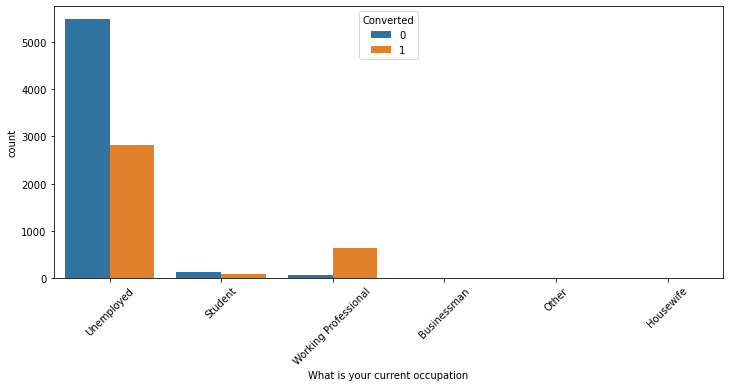

In [25]:
# Data visualization
plt.figure(figsize=(12,5))
sns.countplot(df['What is your current occupation'],hue=df['Converted'])
plt.xticks(rotation=45)
plt.show()

- From the above plot we can observe and in terms of business aspect below observations are made
    - Unemployed are the one who are willing to upskill for getting better jobs
    - Working professional who are looking for professional growth
    - So, Working professionals and unemployed are good to target

### Country

In [26]:
# Checking for Percentage of missing values
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Bangladesh                 2
Philippines                2
Belgium                    2
Netherlands                2
Uganda                     2
China                      2
Italy                      2
Sri Lanka                  1
Liberia                    1
Switzerland                1
Denmark                    1
Russia                     1
Tanzania                   1
Kenya         

In [27]:
other_countires = df['Country'].value_counts().index[1:]

In [28]:
df['Country'] = df['Country'].replace(other_countires,'Other_Country')
df['Country'].fillna(df['Country'].mode(),inplace=True)

In [29]:
df['Country'].value_counts()

India            6493
Other_Country     287
Name: Country, dtype: int64

- About 27% of data is missing in the variable country. And most of the leads are from India only and others countires all together contributing around 2 %. So can create a new value as other country to proceed further for modelling.
- For missing value treatment we can use mode to impute the missing values.
- This results in skewed data to India, So it is better to drop this column.

In [30]:
df = df.drop('Country',axis=1)

### City

In [31]:
df['City'].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [32]:
df['City'] = df['City'].replace('Select',)
df['City'].fillna(df['City'].mode(),inplace=True)

In [33]:
df['City'].value_counts(normalize=True)

Mumbai                         0.577345
Thane & Outskirts              0.132224
Other Cities                   0.125998
Other Cities of Maharashtra    0.082826
Other Metro Cities             0.068616
Tier II Cities                 0.012722
Select                         0.000271
Name: City, dtype: float64

In [34]:
df = df.drop('City', axis=1)

- About 15 % of values are missing and 28% are undefined. In total City has about 43% of missing values. If we treat by imputing most occuring value. 
- Thane and Ouskirts also belongs to Mumbai.
- City is biased to Mumbai i.e., about 71%, So we should drop this column

### How did you hear about X Education

In [35]:
# Checking for various responses given by leads
df['How did you hear about X Education'].value_counts()/len(df)*100

Select                   54.577922
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [36]:
df = df.drop('How did you hear about X Education',axis=1)

- From above data we can observe that 24% of data is missing and 54% of the data is not defined. In total unavailable data for this column will be ~78%. So, we can drop this variable
- Most of the things now a days we are hearing through internet i.e., online search.
- If we impute the undefined value Select with Online search data will skew towrds Online search, So we can drop this column.

### Lead Source

In [37]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
welearnblog_Home        1
WeLearn                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
# Based on above observations correcting the values of Lead Source
df['Lead Source'] = df['Lead Source'].replace({'google':'Google','welearnblog_Home':'WeLearn'})
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
WeLearn                 2
Social Media            2
testone                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
# Dropping the records which are having very less number of count from above observation say < 20
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','WeLearn',
                                'Live Chat','Pay per Click Ads','NC_EDM','testone','youtubechannel',
                                'blog'],)
df['Lead Source'].fillna(df['Lead Source'].mode(),inplace=True)

df['Lead Source'].value_counts()

Google              2884
Direct Traffic      2548
Olark Chat          1757
Organic Search      1157
Reference            536
Welingak Website     142
Referral Sites       125
Facebook              55
Name: Lead Source, dtype: int64

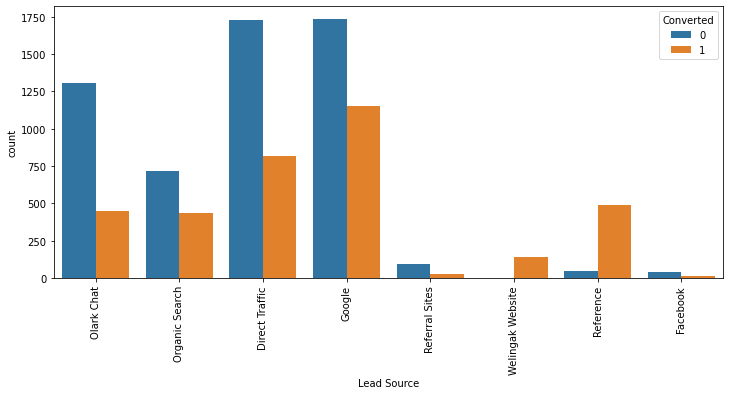

In [40]:
# Data visualization
plt.figure(figsize=(12,5))
sns.countplot(df['Lead Source'],hue=df['Converted'])
plt.xticks(rotation=90)
plt.show()

- Leads generated from google, direct landed on webpage, Quark chat, Reference and Organic search can be a good targetting audience.
- People from Reference and Wellingak website are more likely to convert

### Lead Quality

In [41]:
# Lead quality has highest missing values of 52%.
# Since lead Quality can be a good intepreting variable let's see how it is distrubuted
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [42]:
# Missing values are about 50% and if we replace the null values by 'Not Sure' in the perspective of business 
#this could be an important variable
df['Lead Quality'] = df['Lead Quality'].fillna('Not Sure')
df['Lead Quality'].value_counts(normalize=True)*100

Not Sure             63.409091
Might be             16.883117
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

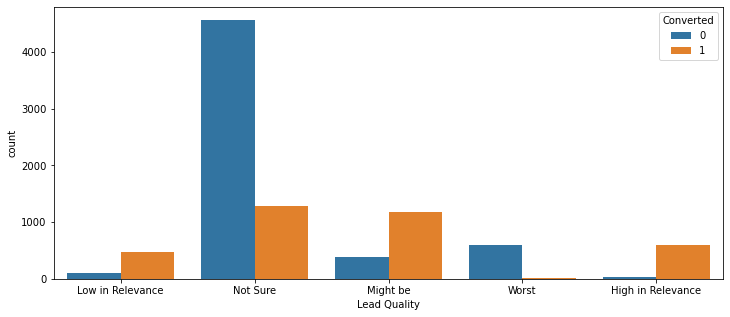

In [43]:
# Data visualization
plt.figure(figsize=(12,5))
sns.countplot(df['Lead Quality'],hue=df['Converted'])
plt.show()

- Lead quality is an unpredictable variable, because not sure leads are more and modelrately likely to convert
- Might be, high in relevance, low in relevance are most likely to converted and can be targeted.

### TotalVisits

In [44]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

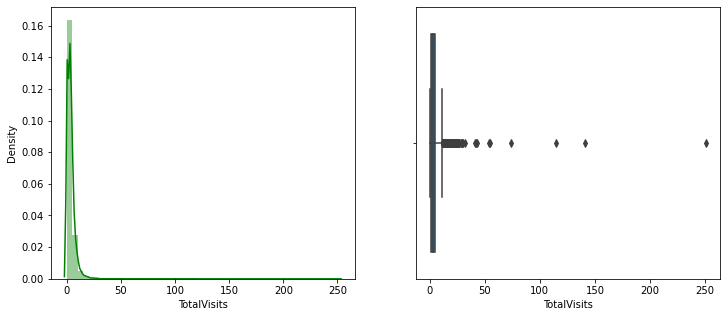

In [45]:
# Data visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['TotalVisits'], color='Green')
plt.subplot(1,2,2)
sns.boxplot(df['TotalVisits'])
plt.show()

In [46]:
# Since outliers are present in the above variable we shall trat them by soft capping for further analysis
percentiles = df['TotalVisits'].quantile([0.01,0.99]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [47]:
percentiles

array([ 0., 17.])

In [48]:
df['TotalVisits'].fillna(df['TotalVisits'].mean(),inplace=True) # A few missing values are treated by mean value

- Data is showing Bi-modal distrubution. Clearly indicates leads are from different background i.e., by occupation, Education level, gender etc.
- Since outliers are present, in order to reduce the computation and model get unaffected, we have treated by soft capping
- Missing values are abou 1.5% and since it is a contineous variable we have imputed with mean.

#### Total Time Spent on Website

In [49]:
df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

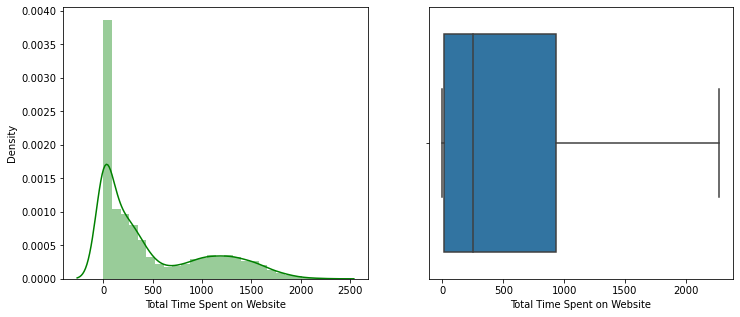

In [50]:
# Univariate Analysis
# Data visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['Total Time Spent on Website'], color='Green')
plt.subplot(1,2,2)
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

- Data is showing Bi-modal distrubution. Clearly indicates leads are from different background i.e., by occupation, Education level, gender etc are spending different time on website.
- No outliers are observed

#### Page Views Per Visit

In [51]:
df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

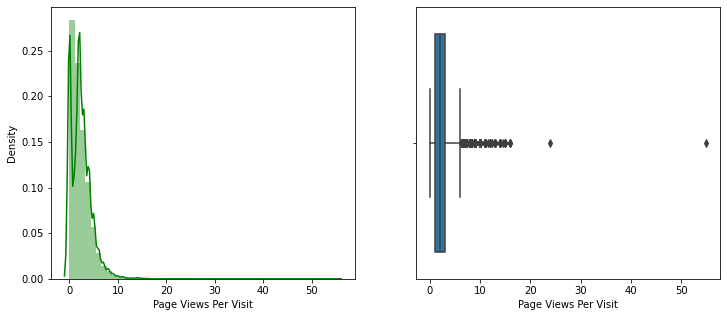

In [52]:
# Data visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['Page Views Per Visit'], color='Green')
plt.subplot(1,2,2)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [53]:
# Treating the missing values
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(),inplace=True)

In [54]:
# Since outliers are present in the above variable we shall trat them by soft capping for further analysis
percentiles = df['Page Views Per Visit'].quantile([0.01,0.99]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

- Data is showing Bi-modal distrubution. Clearly indicates leads are from different background i.e., by occupation, Education level, gender etc.
- Missing values percentage is 1.5% and are imputed with mean
- Since outliers are present, in order to reduce the computation and model get unaffected, we have treated by soft capping

### Last Activity

In [55]:
df['Last Activity'].value_counts() # Check for values in the data for cleansing

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [56]:
df['Last Activity'].value_counts().index

Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Resubscribed to emails', 'Visited Booth in Tradeshow'],
      dtype='object')

In [57]:
# Replacing the very low values by most occuring value to make model simpler
Others = ['Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails']
df['Last Activity']=df['Last Activity'].replace(Others,'Others')
df['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Others                      914
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

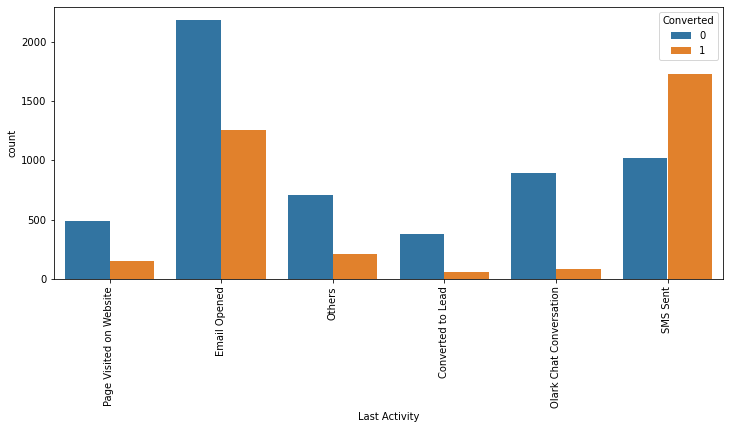

In [58]:
# Data visualization
plt.figure(figsize=(12,5))
sns.countplot(df['Last Activity'],hue=df['Converted'])
plt.xticks(rotation=90)
plt.show()

- Leads with status of last activity as SMS sent can be most targettable
- Leads with Email opened are moderatly likely to target for conversion.

### Specialization

In [59]:
df['Specialization'].value_counts(normalize=True)/len(df)

Select                               2.693837e-05
Finance Management                   1.353854e-05
Human Resource Management            1.176300e-05
Marketing Management                 1.162428e-05
Operations Management                6.977343e-06
Business Administration              5.590197e-06
IT Projects Management               5.076953e-06
Supply Chain Management              4.841139e-06
Banking, Investment And Insurance    4.688552e-06
Media and Advertising                2.815906e-06
Travel and Tourism                   2.815906e-06
International Business               2.469119e-06
Healthcare Management                2.205562e-06
Hospitality Management               1.581346e-06
E-COMMERCE                           1.553603e-06
Retail Management                    1.387146e-06
Rural and Agribusiness               1.012616e-06
E-Business                           7.906731e-07
Services Excellence                  5.548583e-07
Name: Specialization, dtype: float64

In [60]:
df['Specialization'].value_counts().index

Index(['Select', 'Finance Management', 'Human Resource Management',
       'Marketing Management', 'Operations Management',
       'Business Administration', 'IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Media and Advertising', 'Travel and Tourism', 'International Business',
       'Healthcare Management', 'Hospitality Management', 'E-COMMERCE',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],
      dtype='object')

In [61]:
# Customers less than 4 % can be considered as other category, which make ease for further model analysis
others = ['Travel and Tourism', 'Media and Advertising', 'International Business',
       'Healthcare Management', 'Hospitality Management', 'E-COMMERCE',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence','Select']

In [62]:
df['Specialization'] = df['Specialization'].replace(others,'Others')
df['Specialization'].fillna('Others',inplace=True)

In [63]:
df['Specialization'].value_counts(normalize=True)*100

Others                               49.989177
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Name: Specialization, dtype: float64

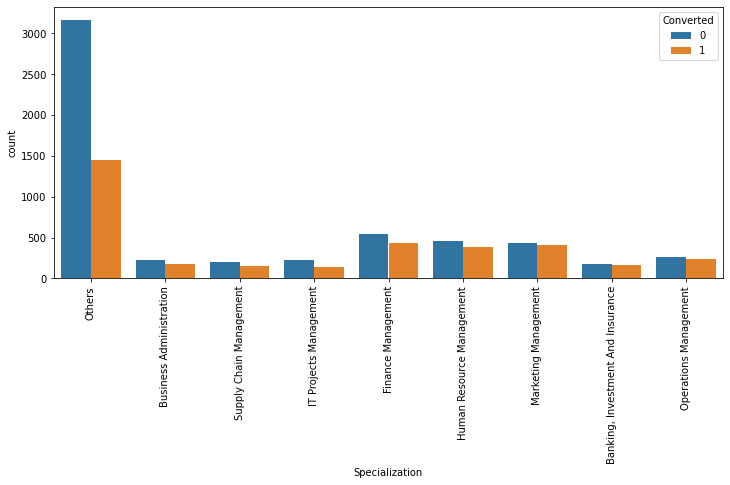

In [64]:
# Data visualization
plt.figure(figsize=(12,5))
sns.countplot(df['Specialization'], hue=df['Converted'])
plt.xticks(rotation=90)
plt.show()

- From above data we can observe that 16% of data is missing and 24% of the data is not defined. In total unavailable data for this column will be ~40%. 
- So we can consider this could be an important variable, we shall treat them by assigning as Others

### Let's check for unique values in the variables

In [65]:
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                    8
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   19
Total Time Spent on Website                 1731
Page Views Per Visit                         103
Last Activity                                  6
Specialization                                 9
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [66]:
# Dropping the variable which are unique from above data
df = df.drop(['Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
        'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [67]:
df.shape

(9240, 24)

### Lets check the value counts of Yes/No variable from above data to decide the vaiable for modeling

### Do Not Call

In [68]:
df['Do Not Call'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [69]:
df.drop('Do Not Call',axis=1,inplace=True)

- All the leads are likely to receive calls about the course, very less number who ignore.
- And we can drop the column

### Do Not Email

In [70]:
df['Do Not Email'].value_counts(normalize=True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

- All the leads are likely to receive mails about the course, there are about 8% people who ignore.

### Converted

In [71]:
df['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

- About 39% of the leads are converted into business

### Search

In [72]:
df['Search'].value_counts(normalize=True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [73]:
# dropping the Search variable, since it is skewed
df = df.drop('Search',axis=1)

### Newspaper Article

In [74]:
df['Newspaper Article'].value_counts(normalize=True) # Check for values in the data for cleansing

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [75]:
# dropping the newspaper article variable, since it is skewed
df = df.drop('Newspaper Article',axis=1)

### Newspaper

In [76]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [77]:
# dropping the newspaper variable, since it is skewed
df = df.drop('Newspaper',axis=1)

### X Education Forums

In [78]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [79]:
# dropping the X Education Forums variable, since it is skewed
df = df.drop('X Education Forums',axis=1)

### Digital Advertisement

In [80]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [81]:
# dropping the Digital Advertisement variable, since it is skewed
df = df.drop('Digital Advertisement',axis=1)

### Through Recommendations

In [82]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [83]:
# dropping the Through Recommendations variable, since it is skewed
df = df.drop('Through Recommendations',axis=1)

### A free copy of Mastering The Interview

In [84]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

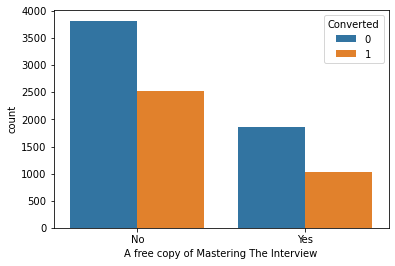

In [85]:
# Data visualization
sns.countplot(df['A free copy of Mastering The Interview'],hue=df['Converted'])
plt.show()

- As per business aspect, most of the people who are looking for upskilling will be either internal promotion or upgrading for current trends.
- A few category of people will be looking for mastering the interview. 
- That is well understandable from above plot

### Checking Other variables

In [86]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [87]:
# Let's categorize the low value counts less than 1% i.e, 90 to others to make modeling easier
df['Last Notable Activity'].value_counts().index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront',
       'View in browser link Clicked', 'Email Received',
       'Resubscribed to emails', 'Form Submitted on Website'],
      dtype='object')

In [88]:
Others = ['Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Form Submitted on Website', 'Email Received',
       'Resubscribed to emails', 'Approached upfront',
       'View in browser link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(Others,'Others')
df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

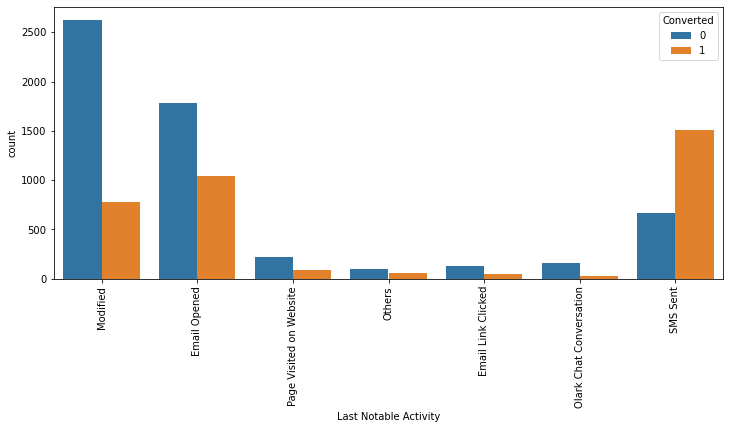

In [89]:
# Data Visualization
plt.figure(figsize=(12,5))
sns.countplot(df['Last Notable Activity'],hue=df['Converted'])
plt.xticks(rotation=90)
plt.show()

- Leads with status of last activity as SMS sent can be most targettable
- Leads with Email opened are moderatly likely to target for conversion.

## Bivariate Analysis

### Total Visits V/s Time spent on website

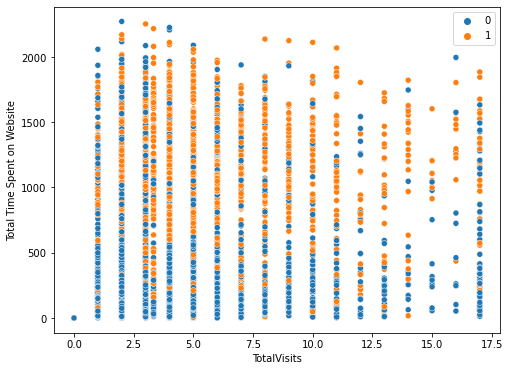

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['TotalVisits'],df['Total Time Spent on Website'],hue=df['Converted'])
plt.legend(loc='best')
plt.show()

- Leads with spending more time on website with 3 or more visits are more likely to get converted

### Page Views Per Visit v/s Total Time Spent on Website

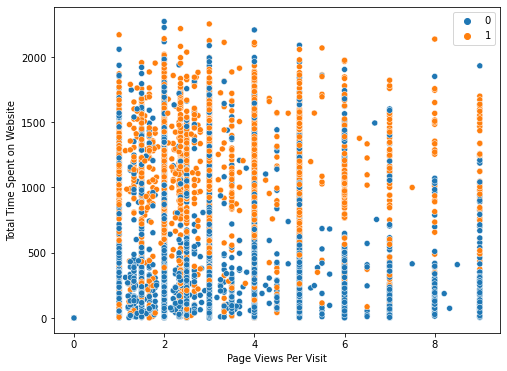

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Page Views Per Visit'],df['Total Time Spent on Website'],hue=df['Converted'])
plt.legend(loc='best')
plt.show()

- Leads with spending more time are more likely to get converted

### Page Views Per Visit v/s TotalVisits

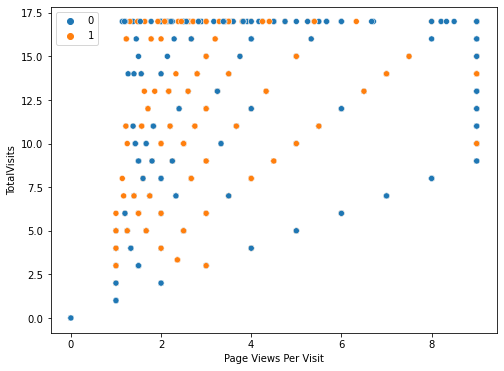

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Page Views Per Visit'],df['TotalVisits'],hue=df['Converted'])
plt.legend(loc='best')
plt.show()

- Total visits about 3 are more likely to convert

### Creating dummy variables for the remaining categorical variables and dropping originals

In [93]:
# Creating dummy variables for the variable 'Lead Origin'
Lead_origin = pd.get_dummies(df['Lead Origin'], prefix='LO',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df,Lead_origin],axis=1)
# Dropping Lead_origin
df1.drop('Lead Origin', axis=1,inplace=True)

# Creating dummy variables for the variable 'Lead Source'
Lead_source = pd.get_dummies(df1['Lead Source'], prefix='LS',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Lead_source],axis=1)
# Dropping Lead_origin
df1.drop('Lead Source', axis=1,inplace=True)

# Creating dummy variables for the variable 'Lead Source'
Last_activity = pd.get_dummies(df1['Last Activity'], prefix='LA',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Last_activity],axis=1)
# Dropping Last_activity
df1.drop('Last Activity', axis=1,inplace=True)

# Creating dummy variables for the variable 'Specialization'
tags = pd.get_dummies(df1['Tags'], prefix='T',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,tags],axis=1)
# Dropping Lead_origin
df1.drop('Tags', axis=1,inplace=True)

# Creating dummy variables for the variable 'Specialization'
Lead_Quality = pd.get_dummies(df1['Lead Quality'], prefix='LQ',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Lead_Quality],axis=1)
# Dropping Lead_origin
df1.drop('Lead Quality', axis=1,inplace=True)

# Creating dummy variables for the variable 'Specialization'
Specialization = pd.get_dummies(df1['Specialization'], prefix='Sp',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Specialization],axis=1)
# Dropping Lead_origin
df1.drop('Specialization', axis=1,inplace=True)

# Creating dummy variables for the variable 'What is your current occupation'
Occupation = pd.get_dummies(df1['What is your current occupation'], prefix='Occupation',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Occupation],axis=1)
# Dropping Lead_origin
df1.drop('What is your current occupation', axis=1,inplace=True)

# Creating dummy variables for the variable 'Last Notable Activity'
Last_notable_activity = pd.get_dummies(df1['Last Notable Activity'], prefix='LNA',drop_first=True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,Last_notable_activity],axis=1)
# Dropping Lead_origin
df1.drop('Last Notable Activity', axis=1,inplace=True)



df1.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LO_Quick Add Form,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Email Opened,LA_Olark Chat Conversation,LA_Others,LA_Page Visited on Website,LA_SMS Sent,T_Busy,T_Closed by Horizzon,T_Graduation in progress,T_Interested in full time MBA,T_Interested in other courses,T_Lost to EINS,T_Not doing further education,T_Others,T_Ringing,T_Will revert after reading the email,T_switched off,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,LQ_Worst,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Others,LNA_Page Visited on Website,LNA_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,0,0.0,0,0.0,15.0,15.0,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,No,0,5.0,674,2.5,15.0,15.0,No,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,1,2.0,1532,2.0,14.0,20.0,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,0,1.0,305,1.0,13.0,17.0,No,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,No,1,2.0,1428,1.0,15.0,18.0,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [94]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
# One hot encoding for 'Do Not Email' & 'A free copy of Mastering The Interview'
dummy = pd.get_dummies(df1[['Do Not Email', 'A free copy of Mastering The Interview']], drop_first=True)
df1 = pd.concat([df1,dummy], axis=1)
df1.drop(['Do Not Email', 'A free copy of Mastering The Interview'], axis=1, inplace=True)
df1.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LO_Quick Add Form,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Email Opened,LA_Olark Chat Conversation,LA_Others,LA_Page Visited on Website,LA_SMS Sent,T_Busy,T_Closed by Horizzon,T_Graduation in progress,T_Interested in full time MBA,T_Interested in other courses,T_Lost to EINS,T_Not doing further education,T_Others,T_Ringing,T_Will revert after reading the email,T_switched off,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,LQ_Worst,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Others,LNA_Page Visited on Website,LNA_SMS Sent,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,14.0,20.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,13.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,15.0,18.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [96]:
df1_corr = df1.corr()
corr_final = df1_corr.where(np.triu(np.ones(df1_corr.shape),k=1).astype(np.bool))
corr_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LO_Quick Add Form,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Email Opened,LA_Olark Chat Conversation,LA_Others,LA_Page Visited on Website,LA_SMS Sent,T_Busy,T_Closed by Horizzon,T_Graduation in progress,T_Interested in full time MBA,T_Interested in other courses,T_Lost to EINS,T_Not doing further education,T_Others,T_Ringing,T_Will revert after reading the email,T_switched off,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,LQ_Worst,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Others,LNA_Page Visited on Website,LNA_SMS Sent,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
Converted,NaN,0.044802,0.362483,-0.002672,0.120331,0.157824,-0.051236,0.321702,-0.023695,1.313825e-02,-0.023695,0.018974,-0.128706,-0.005977,0.270574,-0.033058,0.154153,-0.032934,-0.210809,-0.105205,-0.083771,0.325600,0.052753,0.251229,-0.073029,-0.083709,-0.179365,0.168937,-0.098195,-0.250852,-0.283895,0.644307,-0.123718,0.230770,0.342988,-0.446879,-0.198039,0.025791,0.043308,0.047130,-0.001200,0.065853,0.043272,-0.145037,0.019245,0.041567,0.020505,-0.004375,-0.281065,0.313837,-0.021955,-0.244294,-0.072660,0.002280,-0.036051,0.351845,-0.135580,-0.039820
TotalVisits,NaN,NaN,0.325757,0.706150,-0.058977,0.121908,0.407097,-0.232977,-0.041543,1.642193e-17,-0.039800,0.177876,-0.446909,0.288097,-0.195353,0.086604,-0.109544,0.048372,-0.196874,-0.028577,0.247590,0.007112,0.042120,0.022557,0.006483,-0.001379,-0.007082,0.011667,0.012072,-0.102931,0.081034,0.045727,0.027853,0.020131,0.058165,-0.046791,-0.031675,0.064223,0.078198,0.085836,0.045417,0.039439,0.038809,-0.232697,0.058539,-0.008152,0.037907,-0.030567,0.009434,-0.000497,0.066668,-0.141281,-0.052671,0.012532,0.228640,0.006900,0.008938,0.279912
Total Time Spent on Website,NaN,NaN,NaN,0.338886,-0.045424,0.130727,0.276009,-0.139681,-0.034926,3.283101e-02,-0.033930,0.205505,-0.376627,0.095315,-0.107201,0.011327,-0.078543,0.000644,-0.191667,-0.031310,0.028051,0.117223,0.057476,0.071281,-0.031972,-0.018572,-0.056486,0.075209,-0.021823,-0.163082,-0.056182,0.259312,-0.027902,0.102131,0.153766,-0.193533,-0.067979,0.053244,0.074260,0.063852,0.032481,0.067445,0.060720,-0.217161,0.049050,0.007088,0.028115,-0.012518,-0.086489,0.099241,0.009585,-0.106857,-0.051402,0.011003,0.026644,0.125076,-0.046374,0.168298
Page Views Per Visit,NaN,NaN,NaN,NaN,-0.142250,0.139737,0.517575,-0.272301,-0.045465,1.498698e-04,-0.042609,0.230052,-0.537200,0.318361,-0.227107,0.083856,-0.127906,0.065600,-0.244207,-0.016603,0.110422,0.074291,0.061148,-0.050594,0.020928,0.010345,0.005314,-0.021975,0.010400,-0.125919,0.124601,0.057999,0.051450,0.020473,0.067151,-0.042596,-0.028365,0.062555,0.096916,0.090787,0.067996,0.062238,0.056124,-0.285900,0.071577,-0.007485,0.021584,-0.033649,0.018981,-0.006954,0.074068,-0.107480,-0.093660,0.017715,0.030467,0.062799,0.023815,0.290810
Asymmetrique Activity Score,NaN,NaN,NaN,NaN,NaN,-0.102070,-0.170186,0.012317,-0.041050,-1.675519e-03,-0.041050,-0.112100,0.265920,-0.023914,0.003934,-0.020673,0.016484,-0.059382,0.263043,-0.107374,0.050510,-0.055891,-0.005935,0.042546,-0.194616,-0.032286,-0.082032,-0.020840,0.001571,0.080227,-0.132633,0.065808,-0.069092,0.016349,-0.012205,-0.021790,0.020791,-0.040032,-0.042060,-0.039226,-0.011769,-0.045392,-0.040027,0.122969,-0.015430,-0.002116,0.008404,0.026029,-0.036847,0.024631,-0.043983,0.029931,0.117648,-0.000507,0.012677,-0.038901,-0.037241,-0.086907
Asymmetrique Profile Score,NaN,NaN,NaN,NaN,NaN,NaN,0.370099,0.1

In [97]:
corr_final = corr_final.unstack()
corr_final = corr_final.sort_values(ascending=False).drop_duplicates()
corr_final.head(10)

LS_Facebook                                 LO_Lead Import                           0.981709
LNA_Email Opened                            LA_Email Opened                          0.862718
LS_Reference                                LO_Lead Add Form                         0.853202
LNA_SMS Sent                                LA_SMS Sent                              0.852707
Page Views Per Visit                        TotalVisits                              0.706150
LNA_Page Visited on Website                 LA_Page Visited on Website               0.692057
T_Will revert after reading the email       Converted                                0.644307
A free copy of Mastering The Interview_Yes  LO_Landing Page Submission               0.569633
LQ_Not Sure                                 T_Others                                 0.554336
LQ_Might be                                 T_Will revert after reading the email    0.531415
dtype: float64

In [98]:
# Defining X & y
X = df1.drop(['Prospect ID','Converted'],axis=1)
y = df1['Converted']

## Splitting of train-test data

In [99]:
X_train, X_test,y_train , y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 0)

## Feature Scaling

In [100]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
         'Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
         'Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [101]:
# Logistic regression

lr = LogisticRegression()
rfe = RFE(lr,15) # Logistic regression with 20 variable
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False])

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 30),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 29),
 ('Asymmetrique Activity Score', False, 13),
 ('Asymmetrique Profile Score', False, 38),
 ('LO_Landing Page Submission', False, 7),
 ('LO_Lead Add Form', True, 1),
 ('LO_Lead Import', False, 22),
 ('LO_Quick Add Form', False, 17),
 ('LS_Facebook', False, 6),
 ('LS_Google', False, 41),
 ('LS_Olark Chat', True, 1),
 ('LS_Organic Search', False, 42),
 ('LS_Reference', False, 12),
 ('LS_Referral Sites', False, 37),
 ('LS_Welingak Website', True, 1),
 ('LA_Email Opened', False, 14),
 ('LA_Olark Chat Conversation', False, 5),
 ('LA_Others', False, 15),
 ('LA_Page Visited on Website', False, 40),
 ('LA_SMS Sent', True, 1),
 ('T_Busy', False, 4),
 ('T_Closed by Horizzon', True, 1),
 ('T_Graduation in progress', False, 33),
 ('T_Interested  in full time MBA', False, 18),
 ('T_Interested in other courses', True, 1),
 ('T_Lost to EINS', True, 1),
 ('T_Not doing further education', True, 

In [104]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'LO_Landing Page Submission', 'LO_Lead Import', 'LO_Quick Add Form',
       'LS_Facebook', 'LS_Google', 'LS_Organic Search', 'LS_Reference',
       'LS_Referral Sites', 'LA_Email Opened', 'LA_Olark Chat Conversation',
       'LA_Others', 'LA_Page Visited on Website', 'T_Busy',
       'T_Graduation in progress', 'T_Interested  in full time MBA',
       'T_Others', 'LQ_Low in Relevance', 'LQ_Might be', 'LQ_Not Sure',
       'Sp_Business Administration', 'Sp_Finance Management',
       'Sp_Human Resource Management', 'Sp_IT Projects Management',
       'Sp_Marketing Management', 'Sp_Operations Management', 'Sp_Others',
       'Sp_Supply Chain Management', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'LNA_Modified',
       'LNA_Olark Chat Conversa

In [105]:
df1_corr = df1[['Converted','TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'LO_Landing Page Submission',
       'LO_Lead Import', 'LO_Quick Add Form', 'LS_Google', 'LS_Organic Search',
       'LS_Reference', 'LS_Referral Sites', 'LA_Email Opened', 'LA_Others',
       'LA_Page Visited on Website', 'T_Graduation in progress',
       'T_Interested  in full time MBA', 'T_Others', 'LQ_Low in Relevance',
       'LQ_Might be', 'LQ_Not Sure', 'Sp_Business Administration',
       'Sp_Finance Management', 'Sp_Human Resource Management',
       'Sp_IT Projects Management', 'Sp_Marketing Management',
       'Sp_Operations Management', 'Sp_Others', 'Sp_Supply Chain Management',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'LNA_Modified', 'LNA_Olark Chat Conversation',
       'LNA_Page Visited on Website',
       'A free copy of Mastering The Interview_Yes']].corr()
df1_corr

,Converted,TotalVisits,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,LO_Landing Page Submission,LO_Lead Import,LO_Quick Add Form,LS_Google,LS_Organic Search,LS_Reference,LS_Referral Sites,LA_Email Opened,LA_Others,LA_Page Visited on Website,T_Graduation in progress,T_Interested in full time MBA,T_Others,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,A free copy of Mastering The Interview_Yes
Converted,1.000000,4.480160e-02,-0.002672,0.120331,0.157824,-0.051236,-0.023695,1.313825e-02,0.018974,-0.005977,0.270574,-0.033058,-0.032934,-0.105205,-0.083771,-0.073029,-0.083709,-0.250852,0.230770,0.342988,-0.446879,0.025791,0.043308,0.047130,-0.001200,0.065853,0.043272,-0.145037,0.019245,0.041567,0.020505,-0.004375,-0.281065,0.313837,-0.244294,-0.072660,-0.036051,-0.039820
TotalVisits,0.044802,1.000000e+00,0.706150,-0.058977,0.121908,0.407097,-0.041543,1.642193e-17,0.177876,0.288097,-0.195353,0.086604,0.048372,-0.028577,0.247590,0.006483,-0.001379,-0.102931,0.020131,0.058165,-0.046791,0.064223,0.078198,0.085836,0.045417,0.039439,0.038809,-0.232697,0.058539,-0.008152,0.037907,-0.030567,0.009434,-0.000497,-0.141281,-0.052671,0.228640,0.279912
Page Views Per Visit,-0.002672,7.061499e-01,1.000000,-0.142250,0.139737,0.517575,-0.045465,1.498698e-04,0.230052,0.318361,-0.227107,0.083856,0.065600,-0.016603,0.110422,0.020928,0.010345,-0.125919,0.020473,0.067151,-0.042596,0.062555,0.096916,0.090787,0.067996,0.062238,0.056124,-0.285900,0.071577,-0.007485,0.021584,-0.033649,0.018981,-0.006954,-0.107480,-0.093660,0.030467,0.290810
Asymmetrique Activity Score,0.120331,-5.897686e-02,-0.142250,1.000000,-0.102070,-0.170186,-0.041050,-1.675519e-03,-0.112100,-0.023914,0.003934,-0.020673,-0.059382,-0.107374,0.050510,-0.194616,-0.032286,0.080227,0.016349,-0.012205,-0.021790,-0.040032,-0.042060,-0.039226,-0.011769,-0.045392,-0.040027,0.122969,-0.015430,-0.002116,0.008404,0.026029,-0.036847,0.024631,0.029931,0.117648,0.012677,-0.086907
Asymmetrique Profile Score,0.157824,1.219079e-01,0.139737,-0.102070,1.000000,0.370099,-0.112145,-2.463164e-02,0.084733,-0.054377,0.177630,-0.218108,0.043534,0.019838,0.006976,0.008997,-0.009297,-0.203384,0.116620,0.078882,-0.218666,0.111964,0.188325,0.175430,-0.141207,0.155899,0.093086,-0.426026,0.104398,0.010087,-0.021267,0.026774,-0.105059,0.108838,-0.037928,-0.052678,0.006347,0.170416
LO_Landing Page Submission,-0.051236,4.070974e-01,0.517575,-0.170186,0.370099,1.000000,-0.081974,-1.102098e-02,0.090763,0.057774,-0.262879,-0.073380,0.053181,0.052060,0.092714,0.016527,0.008012,-0.152405,-0.003820,0.067190,-0.062191,0.133649,0.199558,0.155891,0.148359,0.129763,0.126161,-0.544831,0.126752,-0.001898,0.002813,-0.000066,0.009529,-0.009242,-0.101822,-0.114790,0.046200,0.569633
LO_Lead Import,-0.023695,-4.154340e-02,-0.045465,-0.041050,-0.112145,-0.081974,1.000000,-8.050619e-04,-0.052125,-0.029277,-0.019203,-0.009062,0.013221,-0.016214,-0.021110,0.004382,0.003820,-0.010807,0.003066,0.002683,0.006207,-0.009636,-0.008283,-0.009979,-0.015715,-0.024438,-0.012366,0.049260,-0.007951,-0.002547,-0.003223,-0.011801,0.016931,-0.011664,0.037095,-0.011000,-0.014609,-0.052178
LO_Quick Add Form,0.013138,1.642193e-17,0.000150,-0.001676,-0.024632,-0.011021,-0.000805,1.000000e+00,-0.007008,-0.003936,-0.002582,-0.001218,-0.008007,0.031400,-0.002838,-0.001147,-0.001178,0.012860,-0.002700,-0.004689,0.007903,-0.002222,-0.003575,-0.003307,-0.002113,-0.003286,-0.002496,0.010406,-0.002061,-0.000342,-0.000433,-0.001587,0.003522,-0.002992,0.013613,-0.001479,-0.001964,-0.007015
LS_Google,0.018974,1.778755e-01,0.230052,-0.112100,0.084733,0.090763,-0.052125,-7.007986e-03,1

In [106]:
# Model building
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train,X_train_sm, sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.3
Date:                Sun, 07 Feb 2021   Deviance:                       2988.6
Time:                        18:06:11   Pearson chi2:                 1.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7974      0.117    -23.844      0.000      -3.027      -2.567
LO_Lead Add Form                          0.4374      0.342      1.277      0.202      -0.234       1.109
LS_Olark Chat                             0.1282      0.119      1.077      0.281      -0.105       0.361
LS_Welingak Website                       5.1067      1.078      4.738      0.000       2.994       7.219
LA_SMS Sent                               1.1634      0.198      5.871      0.000       0.775       1.552
T_Closed by Horizzon                      7.7294      1.019      7.587      0.000       5.733       9.726
T_Interested in other courses            -1.2567      0.340     -3.692      0.000      -1.924      -0.590
T_Lost to EINS                            6.2058      0.567     10.950      0.000       5.095       7.317
T_Not doing further education            -2.2399      1.045     -2.144      0.032      -4.288      -0.192
T_Ringing                                -3.1239      0.217    -14.389      0.000      -3.549      -2.698
T_Will revert after reading the email     4.6530      0.167     27.898      0.000       4.326       4.980
T_switched off                           -3.6533      0.520     -7.027      0.000      -4.672      -2.634
LQ_Worst                                 -2.8536      0.489     -5.842      0.000      -3.811      -1.896
LNA_Email Opened                          1.3727      0.130     10.554      0.000       1.118       1.628
LNA_Others                                1.1940      0.359      3.322      0.001       0.490       1.898
LNA_SMS Sent                              2.3842      0.193     12.337      0.000       2.005       2.763
=========================================================================================================
"""

- Model accuracy is good but there are some features that are having p-value > 0.05. So, proceeding with VIF score and feature elimination.

### VIF

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LS_Welingak Website,1.30
4,T_Closed by Horizzon,1.21
7,T_Not doing further education,1.09
10,T_switched off,1.05
6,T_Lost to EINS,1.02
13,LNA_Others,1.02
14,LNA_SMS Sent,0.78
0,LO_Lead Add Form,0.77
11,LQ_Worst,0.45
3,LA_SMS Sent,0.36


In [109]:
# Dropping high p-value variable LS_Olark Chat
col = col.drop('LS_Olark Chat',1)

In [110]:
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train,X_train_sm, sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.9
Date:                Sun, 07 Feb 2021   Deviance:                       2989.7
Time:                        18:06:11   Pearson chi2:                 1.26e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7485      0.108    -25.528      0.000      -2.959      -2.537
LO_Lead Add Form                          0.4224      0.342      1.235      0.217      -0.248       1.093
LS_Welingak Website                       5.0824      1.077      4.717      0.000       2.971       7.194
LA_SMS Sent                               1.1309      0.196      5.784      0.000       0.748       1.514
T_Closed by Horizzon                      7.7002      1.018      7.561      0.000       5.704       9.696
T_Interested in other courses            -1.2673      0.340     -3.730      0.000      -1.933      -0.601
T_Lost to EINS                            6.1841      0.566     10.923      0.000       5.074       7.294
T_Not doing further education            -2.2641      1.045     -2.168      0.030      -4.311      -0.217
T_Ringing                                -3.1372      0.217    -14.477      0.000      -3.562      -2.713
T_Will revert after reading the email     4.6276      0.165     28.093      0.000       4.305       4.950
T_switched off                           -3.6731      0.520     -7.069      0.000      -4.691      -2.655
LQ_Worst                                 -2.8638      0.488     -5.867      0.000      -3.821      -1.907
LNA_Email Opened                          1.3561      0.129     10.502      0.000       1.103       1.609
LNA_Others                                1.1711      0.358      3.271      0.001       0.469       1.873
LNA_SMS Sent                              2.3934      0.193     12.409      0.000       2.015       2.771
=========================================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LS_Welingak Website,1.30
3,T_Closed by Horizzon,1.21
6,T_Not doing further education,1.09
9,T_switched off,1.05
5,T_Lost to EINS,1.02
12,LNA_Others,1.02
13,LNA_SMS Sent,0.78
0,LO_Lead Add Form,0.77
10,LQ_Worst,0.45
2,LA_SMS Sent,0.36


In [112]:
# Dropping high p-value variable LO_Lead Add Form
col = col.drop('LO_Lead Add Form',1)

In [113]:
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train,X_train_sm, sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1495.7
Date:                Sun, 07 Feb 2021   Deviance:                       2991.3
Time:                        18:06:12   Pearson chi2:                 1.36e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7471      0.108    -25.519      0.000      -2.958      -2.536
LS_Welingak Website                       5.5028      1.022      5.383      0.000       3.499       7.506
LA_SMS Sent                               1.1334      0.195      5.810      0.000       0.751       1.516
T_Closed by Horizzon                      7.9072      1.007      7.849      0.000       5.933       9.882
T_Interested in other courses            -1.2664      0.340     -3.727      0.000      -1.933      -0.600
T_Lost to EINS                            6.2033      0.565     10.977      0.000       5.096       7.311
T_Not doing further education            -2.2531      1.045     -2.155      0.031      -4.302      -0.204
T_Ringing                                -3.1216      0.216    -14.455      0.000      -3.545      -2.698
T_Will revert after reading the email     4.6754      0.161     28.967      0.000       4.359       4.992
T_switched off                           -3.6798      0.520     -7.082      0.000      -4.698      -2.661
LQ_Worst                                 -2.8721      0.489     -5.878      0.000      -3.830      -1.915
LNA_Email Opened                          1.3560      0.129     10.498      0.000       1.103       1.609
LNA_Others                                1.1687      0.358      3.263      0.001       0.467       1.871
LNA_SMS Sent                              2.3970      0.192     12.455      0.000       2.020       2.774
=========================================================================================================
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,T_Not doing further education,1.09
8,T_switched off,1.05
0,LS_Welingak Website,1.03
2,T_Closed by Horizzon,1.02
4,T_Lost to EINS,1.02
11,LNA_Others,1.02
12,LNA_SMS Sent,0.78
9,LQ_Worst,0.45
1,LA_SMS Sent,0.36
3,T_Interested in other courses,0.28


- All p-values equal to or less than 0.05, so we can final the model and find the probablity

In [115]:
# Prediction of y value
y_train_pred = res.predict(X_train_sm)

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conv_Prob
0,1,0.995759
1,0,0.166073
2,0,0.010851
3,0,0.060252
4,0,0.060252


### Plotting the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, 
                                             drop_intermediate = False )

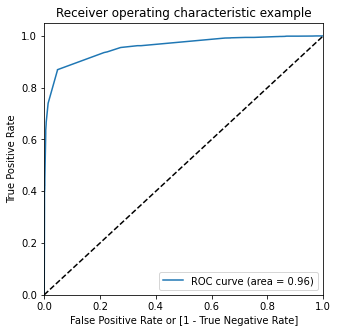

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.995759,1,1,1,1,1,1,1,1,1,1
1,0,0.166073,1,1,0,0,0,0,0,0,0,0
2,0,0.010851,1,0,0,0,0,0,0,0,0,0
3,0,0.060252,1,0,0,0,0,0,0,0,0,0
4,0,0.060252,1,0,0,0,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382035  1.000000  0.000000
0.1   0.1  0.812925  0.955484  0.724794
0.2   0.2  0.920686  0.869688  0.952214
0.3   0.3  0.920841  0.869688  0.952464
0.4   0.4  0.920377  0.868070  0.952715
0.5   0.5  0.920377  0.868070  0.952715
0.6   0.6  0.920377  0.868070  0.952715
0.7   0.7  0.891929  0.739781  0.985989
0.8   0.8  0.891929  0.739781  0.985989
0.9   0.9  0.867192  0.663699  0.992995


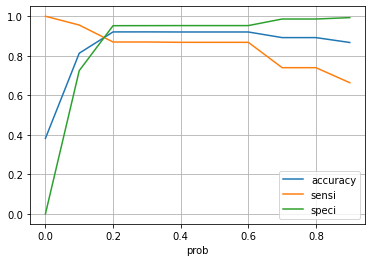

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

- From the curve above, 0.20 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.20 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.995759,1,1,1,1,1,1,1,1,1,1,1
1,0,0.166073,1,1,0,0,0,0,0,0,0,0,0
2,0,0.010851,1,0,0,0,0,0,0,0,0,0,0
3,0,0.060252,1,0,0,0,0,0,0,0,0,0,0
4,0,0.060252,1,0,0,0,0,0,0,0,0,0,0


In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.9206864564007421


In [126]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3806,  191],
       [ 322, 2149]], dtype=int64)

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8696883852691218

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9522141606204654

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.04778583937953465

In [131]:
# positive predictive value 
TP / float(TP+FP)

0.9183760683760683

In [132]:
# Negative predictive value
TN / float(TN+ FN)

0.9219961240310077

- We have acheived the very good scores of Specificity(0.91), Sensitivity(0.92), false positive(0.09), true positive(0.87) and true negative(0.94). Indicates model is well fit.
- Let's check the same on test data

### Precision and Recall & F1 score

#### Precision

In [133]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9183760683760683

#### Recall

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8696883852691218

In [135]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8933693618790272

- Precision is 0.92, recall is 0.87 and F1 Score is 0.89 which are good parameters of the model.
- Where F1 score is a relative average weight of precision and recall.

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

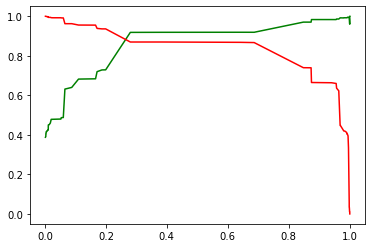

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [138]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
         'Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
         'Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [139]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LO_Quick Add Form,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Email Opened,LA_Olark Chat Conversation,LA_Others,LA_Page Visited on Website,LA_SMS Sent,T_Busy,T_Closed by Horizzon,T_Graduation in progress,T_Interested in full time MBA,T_Interested in other courses,T_Lost to EINS,T_Not doing further education,T_Others,T_Ringing,T_Will revert after reading the email,T_switched off,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,LQ_Worst,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Others,LNA_Page Visited on Website,LNA_SMS Sent,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
2212,-0.418220,1.114854,-0.178729,0.810782,-0.882150,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3034,-0.729100,1.384860,-0.680621,-0.151445,-0.137955,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4492,-0.729100,-0.528900,-0.680621,-0.151445,-0.137955,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5063,0.514418,-0.443155,0.072218,-0.151445,-0.137955,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
7645,-1.039979,-0.890125,-1.182514,2.735237,-0.882150,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test[col])

In [141]:
y_test_pred = res.predict(X_test_sm) # Predicting the y

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
y_pred_1

,0
2212,0.001615
3034,0.969415
4492,0.060252
5063,0.052324
7645,0.060252
...,...
7966,0.994291
9071,0.060252
6208,0.010851
6589,0.060252


In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,Converted,0
0,0,0.001615
1,1,0.969415
2,0,0.060252
3,0,0.052324
4,0,0.060252


In [148]:
# Renaming the column 
y_pred_final.columns = ['Converted', 'Conv_prob']
y_pred_final.head()

,Converted,Conv_prob
0,0,0.001615
1,1,0.969415
2,0,0.060252
3,0,0.052324
4,0,0.060252


In [149]:
y_pred_final['final_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.2 else 0)

In [150]:
y_pred_final['Lead_score'] = y_pred_final.Conv_prob*100

In [151]:
y_pred_final.head()

,Converted,Conv_prob,final_predicted,Lead_score
0,0,0.001615,0,0.161485
1,1,0.969415,1,96.941475
2,0,0.060252,0,6.025177
3,0,0.052324,0,5.232383
4,0,0.060252,0,6.025177


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9217171717171717

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1604,   78],
       [ 139,  951]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8724770642201835

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9536266349583828

In [157]:
f1_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8975932043416706

- Values of Sensitivity, specificity and F1 score are nearest to the train data set and we can say model is good.

In [158]:
df1.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LO_Quick Add Form,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Email Opened,LA_Olark Chat Conversation,LA_Others,LA_Page Visited on Website,LA_SMS Sent,T_Busy,T_Closed by Horizzon,T_Graduation in progress,T_Interested in full time MBA,T_Interested in other courses,T_Lost to EINS,T_Not doing further education,T_Others,T_Ringing,T_Will revert after reading the email,T_switched off,LQ_Low in Relevance,LQ_Might be,LQ_Not Sure,LQ_Worst,Sp_Business Administration,Sp_Finance Management,Sp_Human Resource Management,Sp_IT Projects Management,Sp_Marketing Management,Sp_Operations Management,Sp_Others,Sp_Supply Chain Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Others,LNA_Page Visited on Website,LNA_SMS Sent,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,14.0,20.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,13.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,15.0,18.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [159]:
df_sm = sm.add_constant(df1[col])
df1['Lead Score'] = round(pd.DataFrame(res.predict(df_sm))*100)

In [160]:
df1['Lead Score'].describe()

count    9240.000000
mean       38.478896
std        41.201515
min         0.000000
25%         6.000000
50%        17.000000
75%        96.000000
max       100.000000
Name: Lead Score, dtype: float64

In [161]:
len(df1['Lead Score'][df1['Lead Score']>20])/len(df1)

0.3646103896103896

In [162]:
df['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [163]:
df1['final_predicted'] = df1['Lead Score'].map(lambda x: 1 if x > 20 else 0)

In [164]:
df1[['Prospect ID','Lead Score','Converted','final_predicted']].head()

,Prospect ID,Lead Score,Converted,final_predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2.0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,1.0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,96.0,1,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,87.0,1,1
